Project structure configured:
Base directory: /Users/ihorkorolov/PycharmProjects/machinelearning
Data directory: /Users/ihorkorolov/PycharmProjects/machinelearning/data
Images directory: /Users/ihorkorolov/PycharmProjects/machinelearning/images
Models directory: /Users/ihorkorolov/PycharmProjects/machinelearning/models

Data loaded successfully
Dataset shape: (2128, 23)
Date range: 2012-05-18 to 2021-04-19


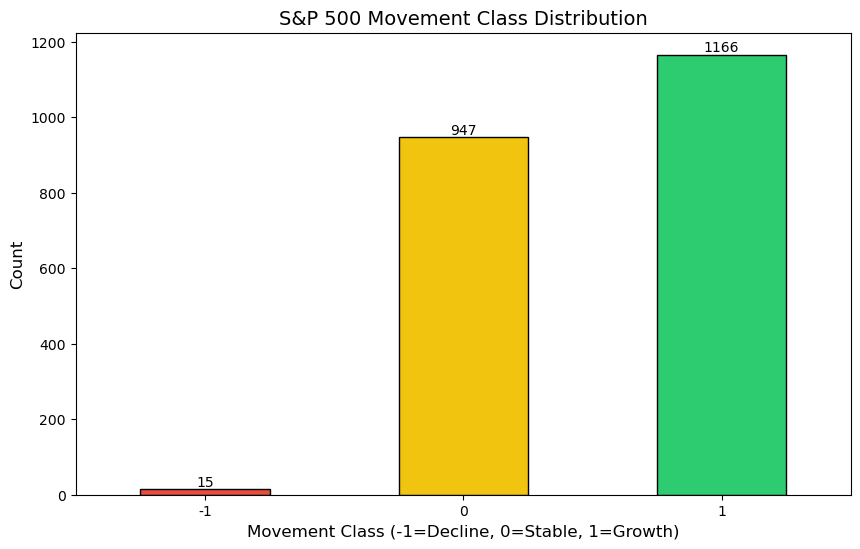

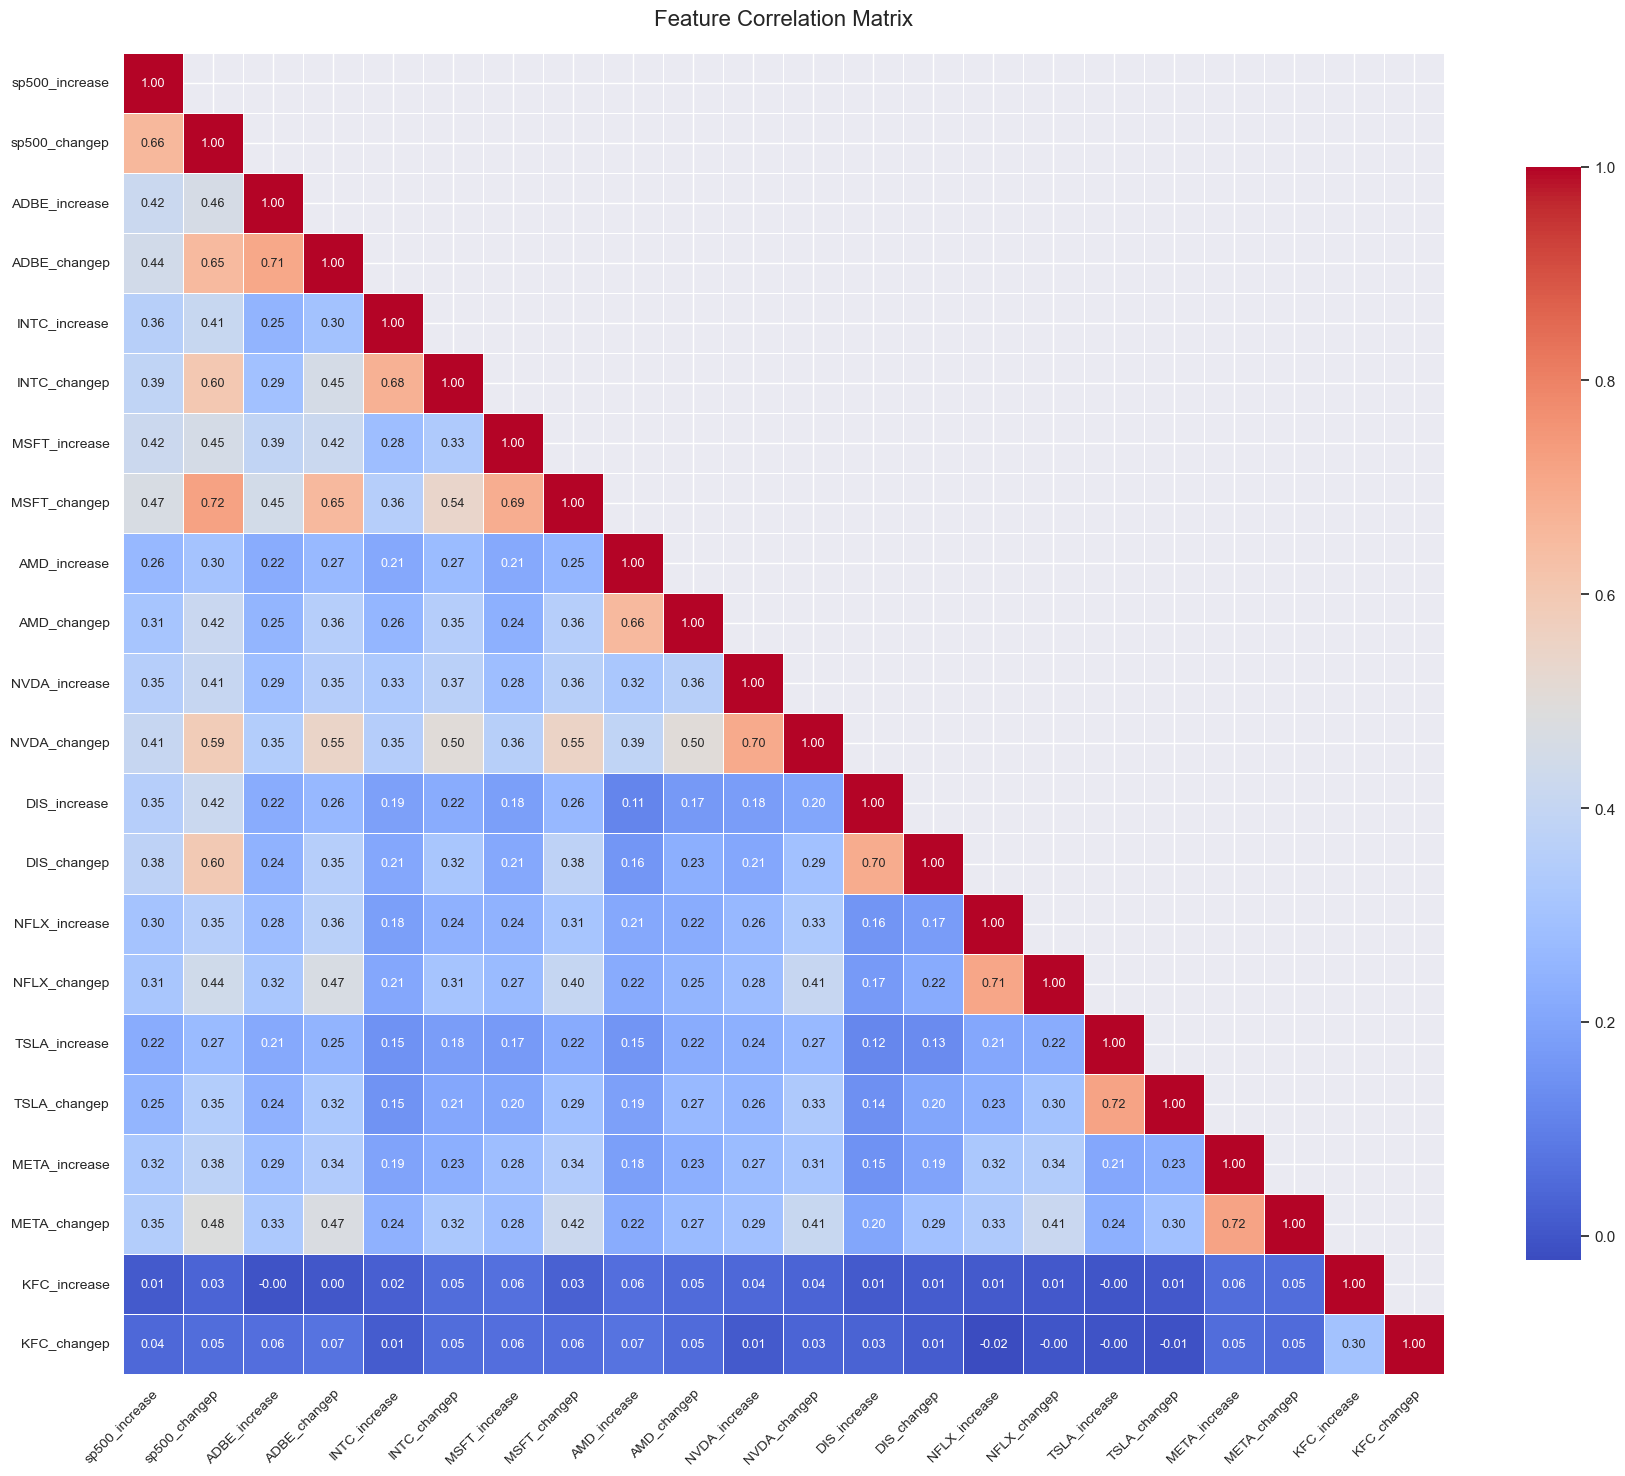


Data preprocessing completed
Features shape: (2128, 10)

Train-test split completed
Training set: 1702 samples
Test set: 426 samples

Starting grid search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Hyperparameter tuning completed

Best Model Parameters:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}

Best Model Validation Accuracy:
0.7761

Classification Performance:
              precision    recall  f1-score   support

     Decline       0.00      0.00      0.00         3
      Stable       0.76      0.75      0.76       190
      Growth       0.82      0.78      0.80       233

    accuracy                           0.76       426
   macro avg       0.53      0.51      0.52       426
weighted avg       0.79      0.76      0.77       426



<Figure size 800x600 with 0 Axes>

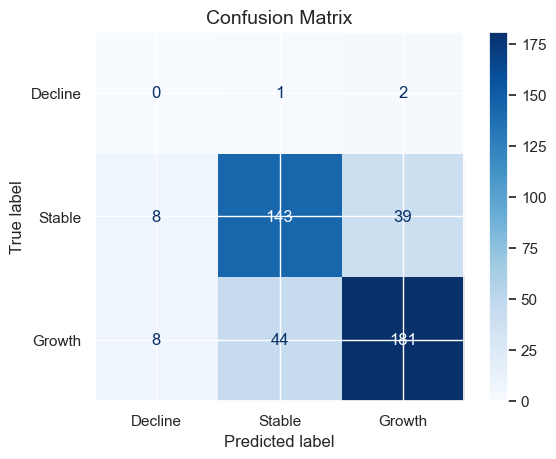

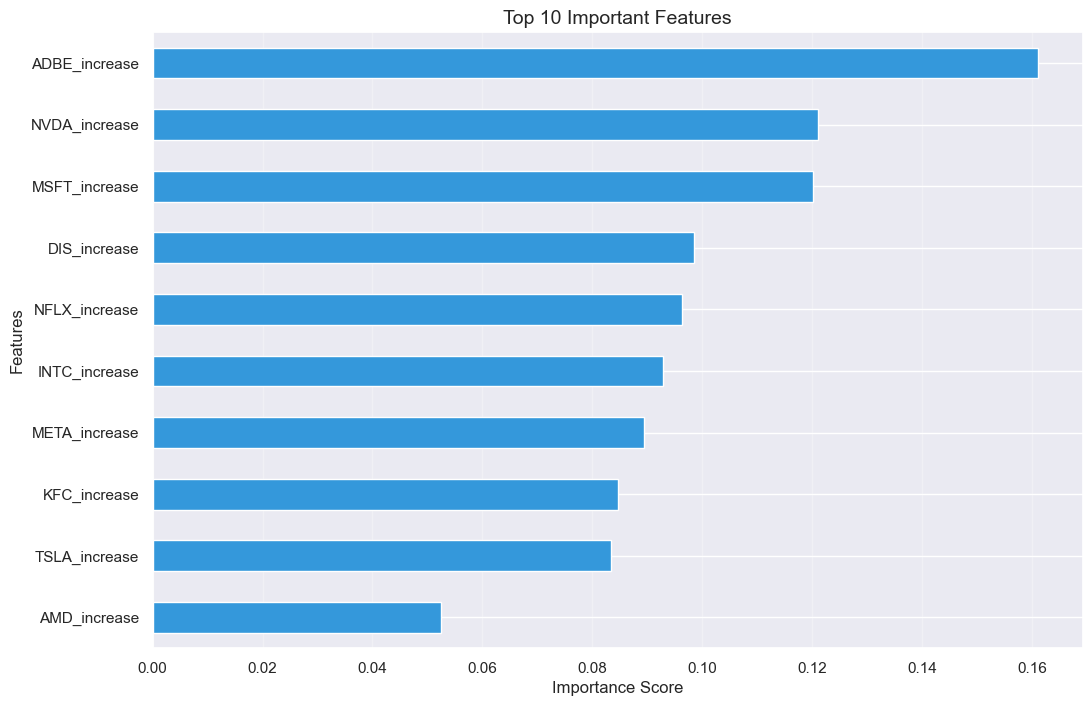


Model artifacts saved successfully
Model path: /Users/ihorkorolov/PycharmProjects/machinelearning/models/sp500_model.pkl
Scaler path: /Users/ihorkorolov/PycharmProjects/machinelearning/models/scaler.pkl

Running unit tests...

Model loading test passed

Prediction test passed


In [1]:
# Imports
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Configure Paths and Directories
try:
    BASE_DIR = pathlib.Path("/Users/ihorkorolov/PycharmProjects/machinelearning")
    DATA_DIR = BASE_DIR / 'data'
    IMAGES_DIR = BASE_DIR / 'images'
    MODELS_DIR = BASE_DIR / 'models'

    DATA_DIR.mkdir(parents=True, exist_ok=True)
    IMAGES_DIR.mkdir(parents=True, exist_ok=True)
    MODELS_DIR.mkdir(parents=True, exist_ok=True)

    print("Project structure configured:")
    print(f"Base directory: {BASE_DIR}")
    print(f"Data directory: {DATA_DIR}")
    print(f"Images directory: {IMAGES_DIR}")
    print(f"Models directory: {MODELS_DIR}")

except Exception as e:
    print(f"Configuration error: {str(e)}")
    raise


# Load Dataset

try:
    data_path = DATA_DIR / 'sp500_stocks.csv'
    
    if not data_path.exists():
        raise FileNotFoundError(f"Data file not found at {data_path}")
    
    df = pd.read_csv(data_path, parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    
    print("\nData loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")

except Exception as e:
    print(f"\nData loading failed: {str(e)}")
    print("\nTroubleshooting steps:")
    print(f"1. Ensure file exists at: {data_path}")
    print(f"2. Verify file permissions")
    raise


# Exploratory Data Analysis (EDA)


# Class Distribution

try:
    plt.figure(figsize=(10,6))
    ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
        color=['#e74c3c', '#f1c40f', '#2ecc71'],
        edgecolor='black'
    )
    plt.title('S&P 500 Movement Class Distribution', fontsize=14)
    plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.savefig(IMAGES_DIR / 'class_distribution.png', bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"Visualization error: {str(e)}")


# Correlation Analysis 

try:
    plt.figure(figsize=(18, 15))
    corr_matrix = df.corr(numeric_only=True)
    
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        annot_kws={"size": 9, "ha": 'center', "va": 'center'},
        cbar_kws={"shrink": 0.8},
        square=True
    )
    
    plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
    plt.yticks(fontsize=10, rotation=0)
    
    plt.tight_layout()
    plt.savefig(IMAGES_DIR / 'correlation_matrix.png', bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"Correlation analysis error: {str(e)}")


# Data Preprocessing

try:
    features = [
        'ADBE_increase', 'INTC_increase', 'MSFT_increase',
        'AMD_increase', 'NVDA_increase', 'DIS_increase',
        'NFLX_increase', 'TSLA_increase', 'META_increase',
        'KFC_increase'
    ]

    X = df[features]
    y = df['sp500_increase']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("\nData preprocessing completed")
    print(f"Features shape: {X_scaled.shape}")

except Exception as e:
    print(f"\nPreprocessing error: {str(e)}")
    raise


# Model Training


# Train-Test Split

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print("\nTrain-test split completed")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

except Exception as e:
    print(f"\nData splitting error: {str(e)}")
    raise


# Hyperparameter Tuning

try:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    }

    rf = RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    print("\nStarting grid search...")
    grid_search.fit(X_train, y_train)
    
    print("\nHyperparameter tuning completed")

except Exception as e:
    print(f"\nModel training error: {str(e)}")
    raise


# Best Model Selection

try:
    best_model = grid_search.best_estimator_
    print("\nBest Model Parameters:")
    print(grid_search.best_params_)
    print("\nBest Model Validation Accuracy:")
    print(f"{grid_search.best_score_:.4f}")

except Exception as e:
    print(f"\nModel selection error: {str(e)}")
    raise


# Model Evaluation


# Classification Report

try:
    y_pred = best_model.predict(X_test)
    print("\nClassification Performance:")
    print(classification_report(y_test, y_pred, 
                               target_names=['Decline', 'Stable', 'Growth']))

except Exception as e:
    print(f"\nEvaluation error: {str(e)}")


# Confusion Matrix

try:
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, 
        display_labels=['Decline', 'Stable', 'Growth'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix', fontsize=14)
    plt.savefig(IMAGES_DIR / 'confusion_matrix.png', 
               bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"\nConfusion matrix error: {str(e)}")


# Feature Importance

try:
    plt.figure(figsize=(12,8))
    feature_importance = pd.Series(best_model.feature_importances_, 
                                  index=features)
    feature_importance.nlargest(10).sort_values().plot(
        kind='barh', 
        color='#3498db'
    )
    plt.title('Top 10 Important Features', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.savefig(IMAGES_DIR / 'feature_importance.png', 
               bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"\nFeature importance error: {str(e)}")


# Model Deployment

try:
    model_path = MODELS_DIR / 'sp500_model.pkl'
    scaler_path = MODELS_DIR / 'scaler.pkl'
    
    joblib.dump(best_model, model_path)
    joblib.dump(scaler, scaler_path)
    
    print("\nModel artifacts saved successfully")
    print(f"Model path: {model_path}")
    print(f"Scaler path: {scaler_path}")

except Exception as e:
    print(f"\nModel saving error: {str(e)}")
    raise


# Unit Tests

def test_model_loading():
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        assert model is not None and scaler is not None
        print("\nModel loading test passed")
    except Exception as e:
        print(f"\nModel loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("\nPrediction test passed")
    except Exception as e:
        print(f"\nPrediction test failed: {str(e)}")

print("\nRunning unit tests...")
test_model_loading()
test_prediction()